# Microsoft Movie Analysis

**Author:** Kimberly Dickson
***

![title](images/diverse_audience.jpg)

iStock logo

## Overview
This research has been developed to help Microsoft determine the profitability of entering the movie industry.  The goal is to perform an EDA (Exploratory Data Analysis) model comparing the audience by generation to identify the movie releases that made the most revenue.  This will help Microsoft determine the type of movie to make based on a targeted audience. The analysis will consist of the top 10 movies budget, ratings, and genre.  This analysis is to get a sense of how movie tastes differ by age.  The data comes from IMDB movies and ratings csv files.  

##  Business Problem

Designing an Audience Based Marketing Strategy

Microsoft will need to understand the type of film they wish to make for example identifying the product, genre, production cost, value etc.  In other words the film package and look at the customers wants, needs and demands to identify a potential market for their film.
***

![title](images/generations.png)

## Data Understanding
***
Before I got started, I installed the various libraries needed.  Next I downloaded the 11 csv datasets that was provided by the instructor to determine what type of analysis I would provide to Microsoft. The data represented movies and certain attributes that help determine which movies make the most at the boxoffice.  I wanted to see how does the different generations rated the movies based off the genre and how it changed over the last 10 years.


***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as mcolors
import seaborn as sns
sns.set()

import sqlite3

import random

from IPython.display import Image 
from pandas import Series, DataFrame
from matplotlib.pyplot import show,figure,subplot
from matplotlib import dates as dates 

## Preparing the Data

***
My analysis included 2 datasets the IMDB_ratings and IMDB_movies data from the IMDB dataset library.
***

In [2]:
ratings = pd.read_csv('data/zippedData/IMDB_ratings.csv.zip')
movies = pd.read_csv('data/zippedData/IMDB_movies.csv.zip')

C:\Users\Lookupkim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


*** 
I began cleaning the two datasets by using the info() function, checking for null values, looking at a sample of the data, and merging the two tables, This will set me up to start analyzing the data.
***

In [3]:
movies_ratings = pd.merge(movies, ratings, on='imdb_title_id')

*** 

The movies and ratings datasets both includes 85,855 movies. I will be exploring both as we go. Therefore, I merged the datasets and name the data "movies_ratings".  I found some interesting observations. For example, the columns are objects, integers and floats, I turned the 'year' column into an integer, I also limited the analysis for the years of 2010 - 2019 since 2020 had limited data.

***

In [4]:
movies_ratings['year'] = movies_ratings.year.astype('str')
movies_ratings['year'] = movies_ratings.year.str.strip()
movies_ratings.year[movies_ratings.year=='TV Movie 2019'] = 2019
movies_ratings['year'] = movies_ratings.year.astype('int', errors='ignore')

<ipython-input-4-48ef59eed924>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ratings.year[movies_ratings.year=='TV Movie 2019'] = 2019


***
# The dataset is now ready for me to start visualizing.  

***
# Top 10 Movie Genres
I started exploring the top 10 movie genres after 2010.

As you will see, out of the 10 top genres, the Drama genre have over 40% subsequently more movies produced than Comedy which can second.  .
***

In [5]:
df_genres = movies_ratings[['genre','title']].groupby(['genre']).count().reset_index().rename(columns={'title':'number_of_movies'})

df_genres = df_genres.sort_values(by='number_of_movies', ascending=False)
df_genres_top10 = df_genres.iloc[:10]
df_genres_top10

,genre,number_of_movies
701,Drama,12543
467,Comedy,7693
495,"Comedy, Drama",4039
823,"Drama, Romance",3455
581,"Comedy, Romance",2508
505,"Comedy, Drama, Romance",2293
1009,Horror,2268
847,"Drama, Thriller",1348
623,"Crime, Drama",1343
50,"Action, Crime, Drama",1310


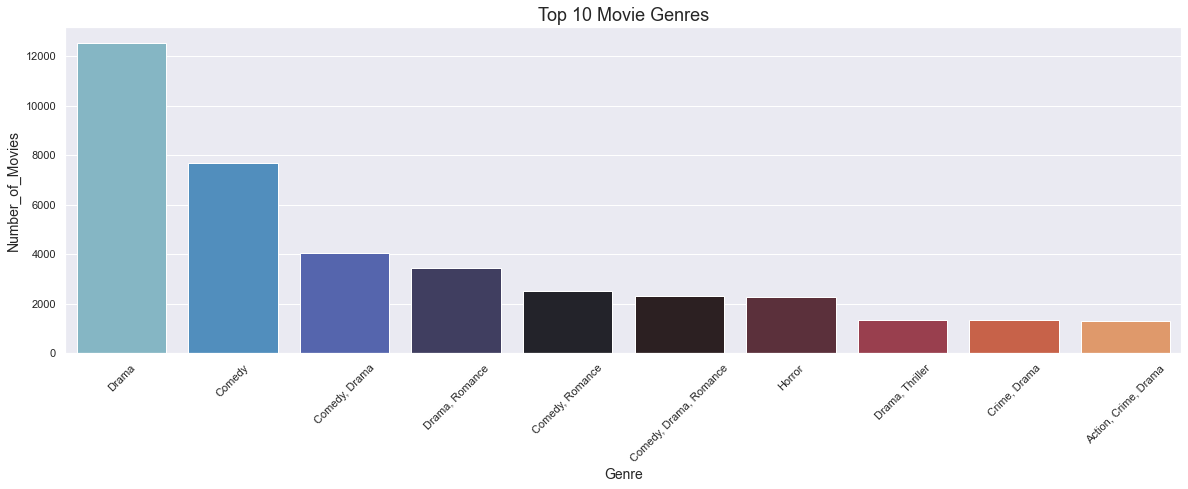

<Figure size 432x288 with 0 Axes>

In [6]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.barplot(x = df_genres_top10['genre'],
            y = df_genres_top10['number_of_movies'], palette='icefire',)
           

plt.xticks(rotation=45)

plt.xlabel('Genre', size = 14)
plt.ylabel('Number_of_Movies', size = 14)
plt.title('Top 10 Movie Genres', size = 18)
plt.show()
plt.savefig("Top 10 Movie Genres.jpg")


***
## Ratings for male vs female voters.   

I took a look at the total number of all Male and Female voters, Generation X voters, Millennials, and Generation Z voters.
    
From the analysis, In 2010 males voted over 70% more times than females.  There votes peaked in 2013 however, over the years the total of votes began to decline.  I am also seeing that the female votes are steadier than the male votes.  The male votes have been declining over the last 5 years by around 50%. 

    
***

In [7]:
df_male_female_t = movies_ratings[movies_ratings.year >= 2010]
df_male_female_t = df_male_female_t[df_male_female_t.year < 2020] #excludes 2020 
df_male_female_t = df_male_female_t.rename(columns={'males_allages_votes':'males_total_votes','females_allages_votes':'females_total_votes',
                                                    'males_45age_votes':'males_generation_x_votes','females_45age_votes':'females_generation_x_votes',
                                                   'males_30age_votes':'males_millennials_votes','males_30age_votes':'males_millennials_votes',
                                                   'females_30age_votes':'females_millennials_votes','males_18age_votes':'males_generation_z_votes',
                                                   'females_18age_votes':'females_generation_z_votes'})
df_male_female_t = df_male_female_t[['year','title','males_total_votes','females_total_votes','males_generation_x_votes','females_generation_x_votes',
                                     'males_millennials_votes','females_millennials_votes','males_generation_z_votes',
                                     'females_generation_z_votes']].groupby(['year']).sum().reset_index()
df_male_female_t = df_male_female_t.iloc[:10]
df_male_female_t

,year,males_total_votes,females_total_votes,males_generation_x_votes,females_generation_x_votes,males_millennials_votes,females_millennials_votes,males_generation_z_votes,females_generation_z_votes
0,2010,20323022.0,5430045.0,2648696.0,508667.0,11462677.0,2643562.0,5213251.0,1969087.0
1,2011,22191483.0,5796508.0,2960250.0,582714.0,12373034.0,2856863.0,5738887.0,2020880.0
2,2012,21641669.0,5552275.0,2835241.0,563358.0,11522392.0,2576852.0,5874978.0,1986853.0
3,2013,23698450.0,5779884.0,3055031.0,585679.0,12239258.0,2612719.0,6649546.0,2085746.0
4,2014,22314161.0,5509956.0,2866358.0,551124.0,11120582.0,2398250.0,6550683.0,2069082.0
5,2015,16653652.0,4055821.0,2314625.0,438371.0,8293223.0,1787644.0,4711739.0,1459769.0
6,2016,16915822.0,4063658.0,2318279.0,430629.0,8220870.0,1727711.0,4757694.0,1451250.0
7,2017,14724609.0,3382082.0,2107799.0,394723.0,7022786.0,1425441.0,4099071.0,1176593.0
8,2018,12202208.0,2835715.0,1822236.0,348302.0,5748438.0,1171426.0,3318267.0,973358.0
9,2019,10639463.0,2252737.0,1524841.0,282486.0,4999823.0,946339.0,2963887.0,762292.0


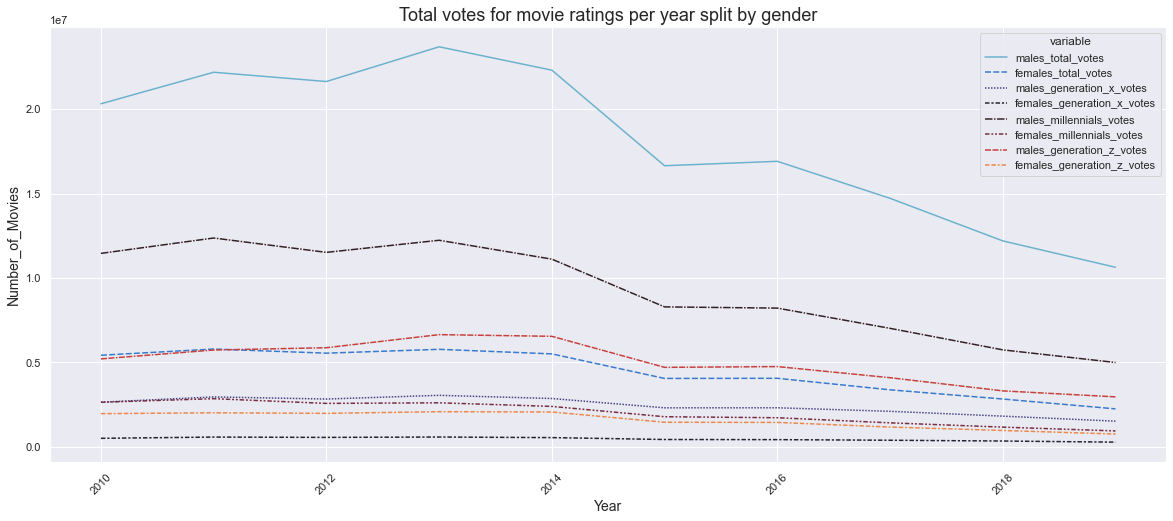

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(20, 8))
categorical = pd.melt(df_male_female_t,id_vars='year')
sns.lineplot(x="year", y="value", hue="variable", style = "variable", data=categorical, palette='icefire')



plt.xticks(rotation=45)

plt.xlabel('Year', size = 14)
plt.ylabel('Number_of_Movies', size = 14)
plt.title('Total votes for movie ratings per year split by gender', size = 18)
plt.show()
plt.savefig("Total votes for movie ratings per year split by gender.jpg")

In [9]:
df_reviews2010 = movies_ratings[movies_ratings.year >= 2010]
df_reviews2010 = df_reviews2010[df_reviews2010.year < 2020] #excludes 2020 
df_reviews2010['budget'] = df_reviews2010['budget'].str.split(' ', expand = True)[1]
df_reviews2010.dropna(inplace=True)
df_reviews2010 = df_reviews2010.rename(columns={'males_allages_votes':'males_total_votes','females_allages_votes':'females_total_votes',
                                                    'males_45age_votes':'males_generation_x_votes','females_45age_votes':'females_generation_x_votes',
                                                   'males_30age_votes':'males_millennials_votes','males_30age_votes':'males_millennials_votes',
                                                   'females_30age_votes':'females_millennials_votes','males_18age_votes':'males_generation_z_votes',
                                                   'females_18age_votes':'females_generation_z_votes'})
df_reviews2010 = df_reviews2010[['genre','budget','worlwide_gross_income','year','males_total_votes','females_total_votes','males_generation_x_votes','females_generation_x_votes',
                                     'males_millennials_votes','females_millennials_votes','males_generation_z_votes',
                                     'females_generation_z_votes']].groupby(['worlwide_gross_income','budget','genre']).sum().reset_index()

df_reviews2010 = df_reviews2010.iloc[:10]
df_reviews2010

,worlwide_gross_income,budget,genre,year,males_total_votes,females_total_votes,males_generation_x_votes,females_generation_x_votes,males_millennials_votes,females_millennials_votes,males_generation_z_votes,females_generation_z_votes
0,$ 100014025,30000000,"Action, Thriller",2017,106270.0,21507.0,18638.0,2577.0,54191.0,9712.0,24218.0,7044.0
1,$ 100129872,12000000,"Biography, Comedy, Drama",2013,54686.0,22359.0,12115.0,4113.0,28270.0,11021.0,11351.0,5704.0
2,$ 100375432,20000000,"Comedy, Romance",2014,24360.0,12530.0,4426.0,1744.0,12582.0,5737.0,5335.0,3790.0
3,$ 100502638,5000000,"Comedy, Drama",2013,16434.0,6112.0,2422.0,598.0,8767.0,2869.0,3516.0,1913.0
4,$ 100541806,58000000,"Horror, Sci-Fi, Thriller",2017,128686.0,22715.0,18113.0,2460.0,68126.0,10818.0,30965.0,7114.0
5,$ 100654149,28000000,"Comedy, Family",2014,22971.0,8484.0,3417.0,795.0,11696.0,3721.0,6240.0,3166.0
6,$ 1009888,2700000,"Action, Thriller",2019,2331.0,196.0,908.0,68.0,1038.0,77.0,186.0,33.0
7,$ 101134059,60000000,"Biography, Drama",2015,64899.0,30337.0,10420.0,2942.0,33273.0,13669.0,16340.0,11017.0
8,$ 10116816,12000000,"Biography, Crime, Drama",2017,11240.0,2798.0,2667.0,695.0,5541.0,1196.0,2193.0,641.0
9,$ 10117966,35000000,"Crime, Drama, Thriller",2011,30008.0,5793.0,5569.0,839.0,18270.0,3268.0,5016.0,1403.0


In [10]:
df_reviews2010 = pd.DataFrame(df_reviews2010)
print (df_reviews2010.dtypes)

worlwide_gross_income          object
budget                         object
genre                          object
year                            int32
males_total_votes             float64
females_total_votes           float64
males_generation_x_votes      float64
females_generation_x_votes    float64
males_millennials_votes       float64
females_millennials_votes     float64
males_generation_z_votes      float64
females_generation_z_votes    float64
dtype: object


In [11]:
df_reviews2010['budget'] = df_reviews2010.budget.astype('int')


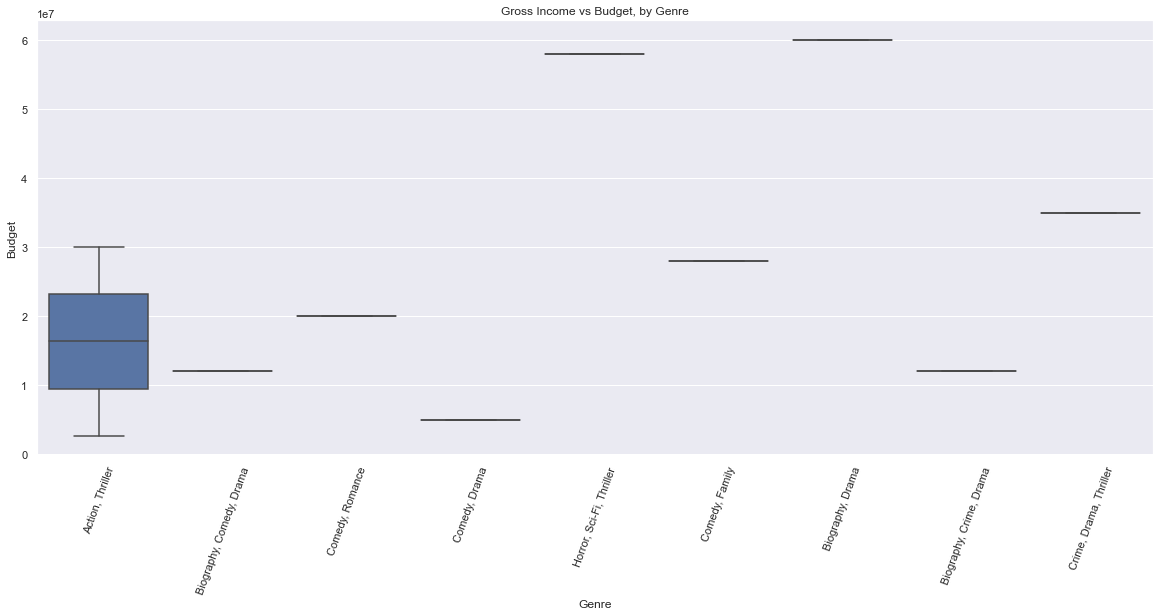

In [12]:
plt.figure(figsize=(20,8))

sns.boxplot(x="genre", y="budget", data=df_reviews2010)
plt.xticks(rotation= 70)

plt.title('Gross Income vs Budget, by Genre');
plt.ylabel('Budget')
plt.xlabel('Genre')
plt.show()

In [13]:
df_reviews2010['genre'].value_counts()

Action, Thriller            2
Crime, Drama, Thriller      1
Horror, Sci-Fi, Thriller    1
Biography, Crime, Drama     1
Biography, Drama            1
Comedy, Romance             1
Comedy, Family              1
Comedy, Drama               1
Biography, Comedy, Drama    1
Name: genre, dtype: int64

In [14]:
df_reviews2010['genre'].unique()

array(['Action, Thriller', 'Biography, Comedy, Drama', 'Comedy, Romance',
       'Comedy, Drama', 'Horror, Sci-Fi, Thriller', 'Comedy, Family',
       'Biography, Drama', 'Biography, Crime, Drama',
       'Crime, Drama, Thriller'], dtype=object)

In [15]:
df_reviews2010['genre'].nunique()

9

In [16]:
df_reviews2010['genre'].str.get_dummies(sep=',')

,Comedy,Crime,Drama,Family,Romance,Sci-Fi,Thriller,Action,Biography,Comedy,Crime,Horror
0,0,0,0,0,0,0,1,1,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,1,0,0,0,0,1
5,0,0,0,1,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,1,1,0,0,0,0
7,0,0,1,0,0,0,0,0,1,0,0,0
8,0,1,1,0,0,0,0,0,1,0,0,0
9,0,0,1,0,0,0,1,0,0,0,1,0


***
## Top 10 Locations

Next, I wanted to find out the top 10 locations where most movies are produced around the world. As expected, I can see that USA, India 
and the UK have the most votes.  However, USA lead the pack by any overwhelming 75%.

***

In [17]:
df_movies_countries = movies_ratings[['country','title']].groupby(['country']).count().reset_index().rename(columns={'title':'number_of_movies'})
df_movies_countries = df_movies_countries.sort_values(by='number_of_movies', ascending=False)
df_movies_countries = df_movies_countries.iloc[:10]
df_movies_countries

,country,number_of_movies
4285,USA,28511
2064,India,6065
3887,UK,4111
2486,Japan,3077
1116,France,3055
2279,Italy,2444
462,Canada,1802
1615,Germany,1396
3829,Turkey,1351
1924,Hong Kong,1239


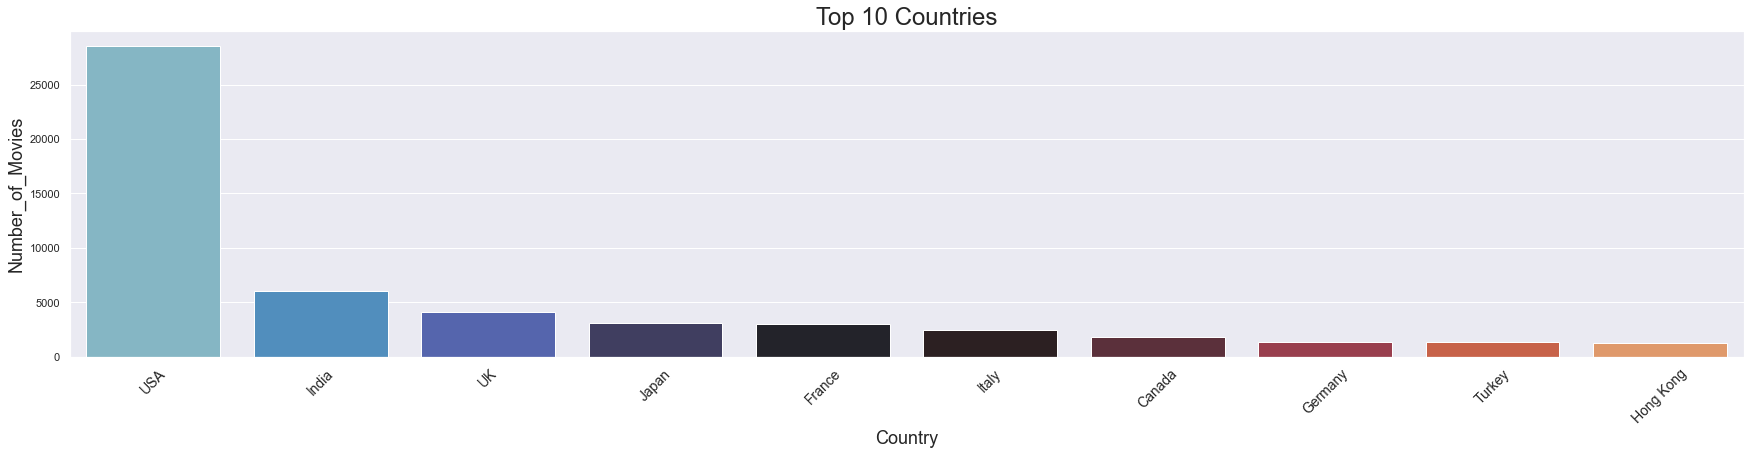

<Figure size 432x288 with 0 Axes>

In [18]:
fig, ax = plt.subplots(figsize=(30, 6))

sns.barplot(x = df_movies_countries['country'],
            y = df_movies_countries['number_of_movies'], palette='icefire',)
           

plt.xticks(size=14, rotation=45)

plt.xlabel('Country', size = 18)
plt.ylabel('Number_of_Movies', size = 18)
plt.title('Top 10 Countries', size = 24)
plt.show()
plt.savefig("Top 10 Countries.jpg")

***
## Top 10 Production Companies

And finally, I took a look at the top 10 companies with most movies produced in the world. Metro-Goldwyn Mayer(MGM) came in the lead with Warner Bros on their heals .  These companies out produced the other top 10 production companies. While Columbia and Paramount just about produced the same amount of movies over the last 10 years.

***

In [19]:
df_production_companies = movies_ratings[['production_company','title']].groupby(['production_company']).count().reset_index().rename(columns={'title':'number_of_movies'})
df_production_companies = df_production_companies.sort_values(by='number_of_movies', ascending=False)
df_production_companies = df_production_companies.iloc[:10]
df_production_companies

,production_company,number_of_movies
20924,Metro-Goldwyn-Mayer (MGM),1284
31109,Warner Bros.,1153
8288,Columbia Pictures,914
23502,Paramount Pictures,903
30128,Twentieth Century Fox,865
30401,Universal Pictures,732
24990,RKO Radio Pictures,535
21524,Mosfilm,279
30397,Universal International Pictures (UI),272
6485,Canal+,231


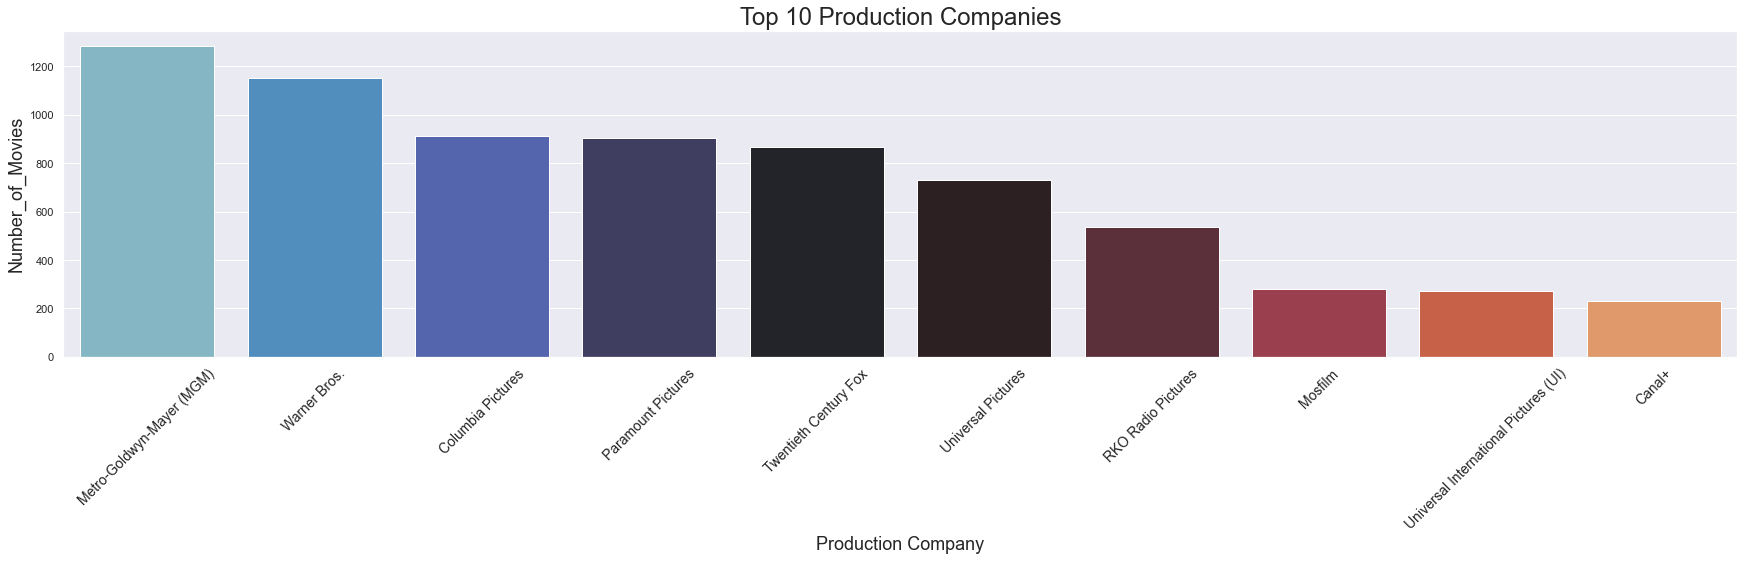

<Figure size 432x288 with 0 Axes>

In [20]:
fig, ax = plt.subplots(figsize=(30, 6))

sns.barplot(x = 'production_company',
            y = 'number_of_movies',
            data = df_production_companies, palette='icefire')

plt.xticks(size=14, rotation=45)

plt.xlabel('Production Company', size = 18)
plt.ylabel('Number_of_Movies', size = 18)
plt.title('Top 10 Production Companies', size = 24)
plt.show()
plt.savefig("Top 10 Production Companies.jpg")
plt.show()


***
## In Conclusion
***
Key Takeaways

   * Comedy/drama films on average are the most profitable
   * The industry leaders preferred creating Action, Drama & Comedy films
   * Millennials and males contributed the most votes for this study
   
Thank you for taking the time to read through this movie exploration.

***